<div class="big_title">LAB #: Title</div>

BIO3782: Biologist's Toolkit (Dalhousie University)

----------------------------------------

# Setup of workspace

<span class="important"></span> Make sure all required files are in the working directory:

* Create a **folder** on the "Desktop" and name it <span class='file'>Lab6</span>
* From Brightspace, download the following files into your new folder <span class='file'>Desktop\Lab6</span>:
   * <span class='file'>model_NPZD2_SHELLE.py</span>
   
* In Spyder, change the "working directory" to: <span class='file'>Desktop\Lab6</span>. Note that to change the "working directory", click on "folder icon" on top-right corner.

----------------------------------


# Loading the survey data

We are investigating the animal species diversity and weights found within plots at our study site. The dataset is stored as a comma separated value (CSV) file. Each row holds information for a single animal, and the columns represent:

Column	| Description
---- | ----
record_id |	Unique id for the observation
month |	month of observation
day |	day of observation
year |	year of observation
plot_id |	ID of a particular plot
species_id |	2-letter code
sex |	sex of animal ("M", "F")
hindfoot_length |	length of the hindfoot in mm
weight |	weight of the animal in grams
genus |	genus of animal
species |	species of animal
taxon |	e.g. Rodent, Reptile, Bird, Rabbit
plot_type |	type of plot


# Downloading the data

We are going to use the R function `download.file(`) to download the CSV file that contains the survey data from Figshare, and we will use `read_csv()` to load the content of the CSV file into R.

Inside the `download.file` command, the first entry is a character string with the source URL ("https://ndownloader.figshare.com/files/2292169"). This source URL downloads a CSV file from figshare. The text after the comma ("data_raw/portal_data_joined.csv") is the destination of the file on your local machine. You'll need to have a folder on your machine called "data_raw" where you'll download the file. So this command downloads a file from Figshare, names it "portal_data_joined.csv" and adds it to a preexisting folder named "data_raw".

<span class="task"></span>

Create a folder named <span class="file">data_raw</span> in your working directory.

Then:

In [2]:
download.file(url = "https://ndownloader.figshare.com/files/2292169",
              destfile = "data_raw/portal_data_joined.csv")

# Reading the data into R

The file has now been downloaded to the destination you specified, but R has not yet loaded the data from the file into memory. To do this, we can use the read_csv() function from the tidyverse package.

Packages in R are basically sets of additional functions that let you do more stuff. The functions we've been using so far, like round(), sqrt(), or c(), come built into R; packages give you access to additional functions. Before you use a package for the first time you need to install it on your machine, and then you should import it in every subsequent R session when you need it.

To install the tidyverse package, we can type install.packages("tidyverse") straight into the console. In fact, it's better to write this in the console than in our script for any package, as there's no need to re-install packages every time we run the script. Then, to load the package type:

In [5]:
## load the tidyverse packages, incl. dplyr
#library(tidyverse)

Now we can use the functions from the tidyverse package. Let's use read_csv() to read the data into a data frame (we will learn more about data frames later):

In [2]:
surveys <- read.csv("data_raw/portal_data_joined.csv")

In [3]:
head(surveys)

record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,genus,species,taxa,plot_type
1,7,16,1977,2,NL,M,32,NA,Neotoma,albigula,Rodent,Control
72,8,19,1977,2,NL,M,31,NA,Neotoma,albigula,Rodent,Control
224,9,13,1977,2,NL,,NA,NA,Neotoma,albigula,Rodent,Control
266,10,16,1977,2,NL,,NA,NA,Neotoma,albigula,Rodent,Control
349,11,12,1977,2,NL,,NA,NA,Neotoma,albigula,Rodent,Control
363,11,12,1977,2,NL,,NA,NA,Neotoma,albigula,Rodent,Control


## View panel
On the Environment Panel, double click on `surveys`

In [9]:
names(surveys)

[1] "record_id"       "month"           "day"             "year"           
 [5] "plot_id"         "species_id"      "sex"             "hindfoot_length"
 [9] "weight"          "genus"           "species"         "taxa"           
[13] "plot_type"

In [22]:
str(surveys)

'data.frame':	34786 obs. of  13 variables:
 $ record_id      : int  1 72 224 266 349 363 435 506 588 661 ...
 $ month          : int  7 8 9 10 11 11 12 1 2 3 ...
 $ day            : int  16 19 13 16 12 12 10 8 18 11 ...
 $ year           : int  1977 1977 1977 1977 1977 1977 1977 1978 1978 1978 ...
 $ plot_id        : int  2 2 2 2 2 2 2 2 2 2 ...
 $ species_id     : Factor w/ 48 levels "AB","AH","AS",..: 16 16 16 16 16 16 16 16 16 16 ...
 $ sex            : Factor w/ 3 levels "","F","M": 3 3 1 1 1 1 1 1 3 1 ...
 $ hindfoot_length: int  32 31 NA NA NA NA NA NA NA NA ...
 $ weight         : int  NA NA NA NA NA NA NA NA 218 NA ...
 $ genus          : Factor w/ 26 levels "Ammodramus","Ammospermophilus",..: 13 13 13 13 13 13 13 13 13 13 ...
 $ species        : Factor w/ 40 levels "albigula","audubonii",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ taxa           : Factor w/ 4 levels "Bird","Rabbit",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ plot_type      : Factor w/ 5 levels "Control","Long-term Krat Exclosure",..: 1

In [23]:
dim(surveys)

[1] 34786    13

In [24]:
nrow(surveys)

[1] 34786

In [25]:
tail(surveys)

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,genus,species,taxa,plot_type
34781,26787,9,27,1997,7,PL,F,21,16,Peromyscus,leucopus,Rodent,Rodent Exclosure
34782,26966,10,25,1997,7,PL,M,20,16,Peromyscus,leucopus,Rodent,Rodent Exclosure
34783,27185,11,22,1997,7,PL,F,21,22,Peromyscus,leucopus,Rodent,Rodent Exclosure
34784,27792,5,2,1998,7,PL,F,20,8,Peromyscus,leucopus,Rodent,Rodent Exclosure
34785,28806,11,21,1998,7,PX,,NA,NA,Chaetodipus,sp.,Rodent,Rodent Exclosure
34786,30986,7,1,2000,7,PX,,NA,NA,Chaetodipus,sp.,Rodent,Rodent Exclosure


In [26]:
summary(surveys)

   record_id         month             day            year         plot_id     
 Min.   :    1   Min.   : 1.000   Min.   : 1.0   Min.   :1977   Min.   : 1.00  
 1st Qu.: 8964   1st Qu.: 4.000   1st Qu.: 9.0   1st Qu.:1984   1st Qu.: 5.00  
 Median :17762   Median : 6.000   Median :16.0   Median :1990   Median :11.00  
 Mean   :17804   Mean   : 6.474   Mean   :16.1   Mean   :1990   Mean   :11.34  
 3rd Qu.:26655   3rd Qu.:10.000   3rd Qu.:23.0   3rd Qu.:1997   3rd Qu.:17.00  
 Max.   :35548   Max.   :12.000   Max.   :31.0   Max.   :2002   Max.   :24.00  
                                                                               
   species_id    sex       hindfoot_length     weight      
 DM     :10596    : 1748   Min.   : 2.00   Min.   :  4.00  
 PP     : 3123   F:15690   1st Qu.:21.00   1st Qu.: 20.00  
 DO     : 3027   M:17348   Median :32.00   Median : 37.00  
 PB     : 2891             Mean   :29.29   Mean   : 42.67  
 RM     : 2609             3rd Qu.:36.00   3rd Qu.: 48.00  


# VIsualize your data

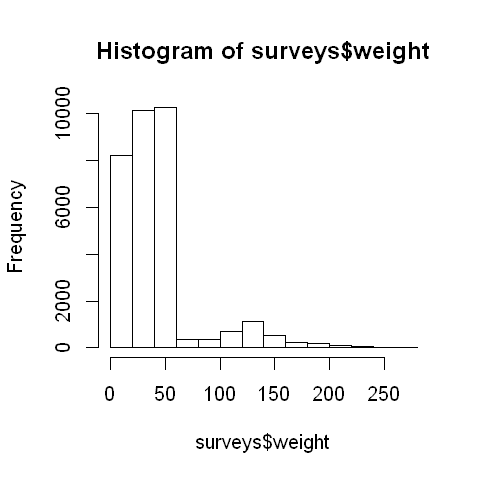

In [27]:
hist(surveys$weight)

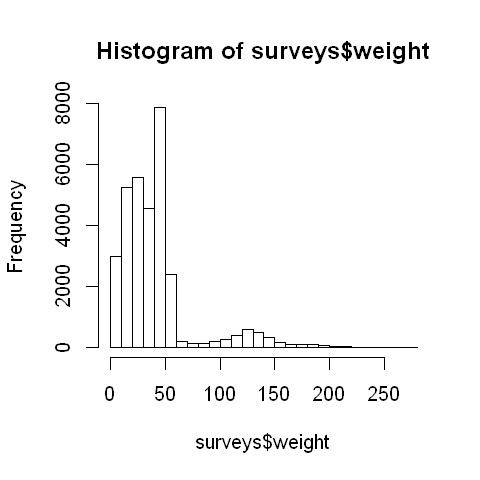

In [28]:
hist(surveys$weight, breaks = 20)

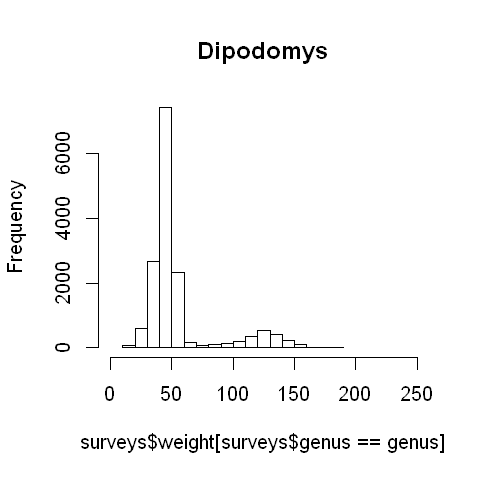

In [44]:
genus = 'Dipodomys'
hist(surveys$weight[surveys$genus == genus],
     breaks = 20,
     xlim = c(0,250),
     main = genus)

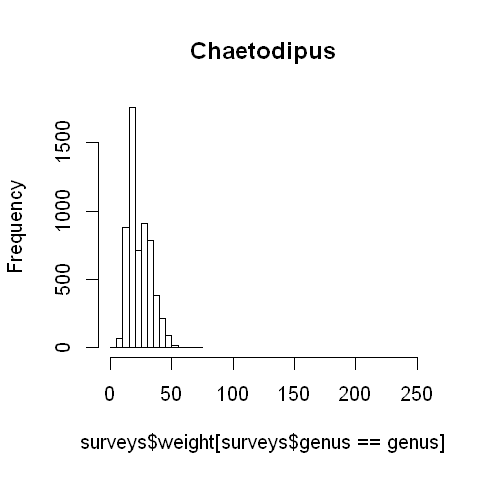

In [45]:
genus = 'Chaetodipus'
hist(surveys$weight[surveys$genus == genus],
     breaks = 20,
     xlim = c(0,250),
     main = genus)

In [40]:
tail(surveys$weight[surveys$taxa == 'Bird'])




[1] NA NA NA NA NA NA

In [9]:
# Make plots a resonable size
options(repr.plot.width=4, repr.plot.height=4)

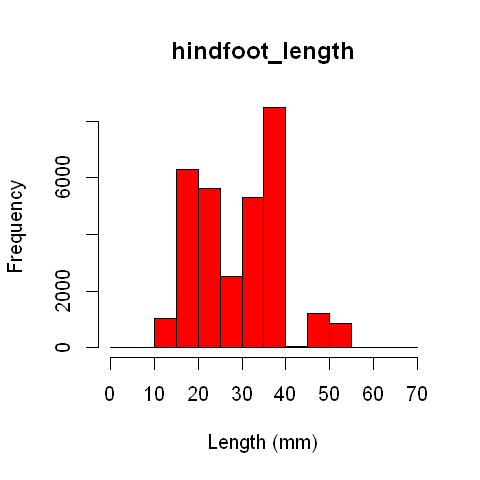

In [20]:
hist(surveys$hindfoot_length, # Data to plot
     main = "hindfoot_length",# Title
     xlab = "Length (mm)",    # x label
     ylab = "Frequency",      # y label
     col = "red")             # color of bars

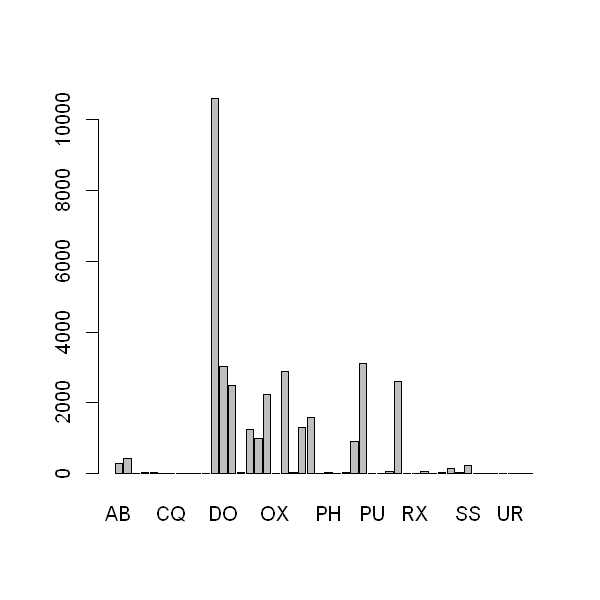

In [28]:
# Make plots a resonable size
options(repr.plot.width=5, repr.plot.height=5)

plot(surveys$species_id)

In [5]:
class(surveys$sex)

[1] "factor"

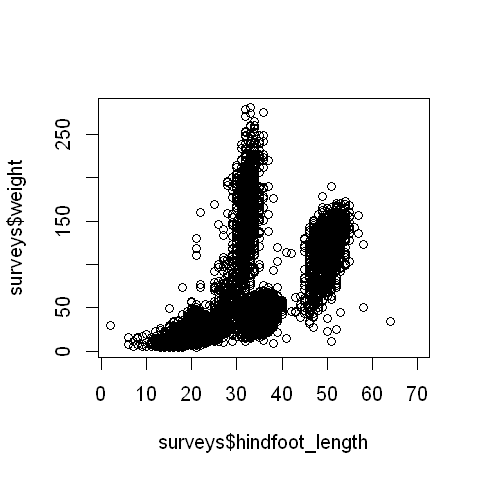

In [11]:
plot(surveys$hindfoot_length,surveys$weight)

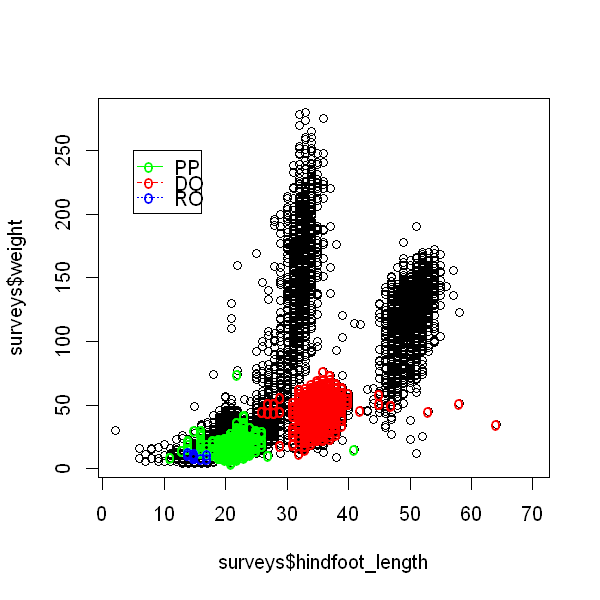

In [31]:
plot(surveys$hindfoot_length,surveys$weight)

points(surveys$hindfoot_length[surveys$species_id == 'PP'],
       surveys$weight[surveys$species_id == 'PP'],
       col="green", pch="o",lty=1)

points(surveys$hindfoot_length[surveys$species_id == 'DO'],
       surveys$weight[surveys$species_id == 'DO'],
       col="red", pch="o",lty=2)

points(surveys$hindfoot_length[surveys$species_id == 'RO'],
       surveys$weight[surveys$species_id == 'RO'],
       col="blue", pch="o",lty=3)

legend(5,250,legend=c('PP','DO','RO'),col=c("green","red","blue"),pch='o',lty=c(1,2,3))

In [13]:
class(surveys$species_id)

[1] "factor"

In [14]:
levels(surveys$species_id)

[1] "AB" "AH" "AS" "BA" "CB" "CM" "CQ" "CS" "CT" "CU" "CV" "DM" "DO" "DS" "DX"
[16] "NL" "OL" "OT" "OX" "PB" "PC" "PE" "PF" "PG" "PH" "PI" "PL" "PM" "PP" "PU"
[31] "PX" "RF" "RM" "RO" "RX" "SA" "SC" "SF" "SH" "SO" "SS" "ST" "SU" "UL" "UP"
[46] "UR" "US" "ZL"

In [15]:
nlevels(surveys$species_id)

[1] 48

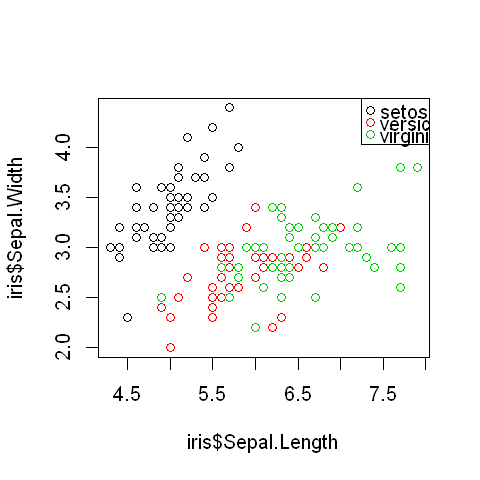

In [21]:
plot(iris$Sepal.Length, iris$Sepal.Width, col = iris$Species)
legend("topright", legend = levels(iris$Species), col = 1:3, pch = 21)

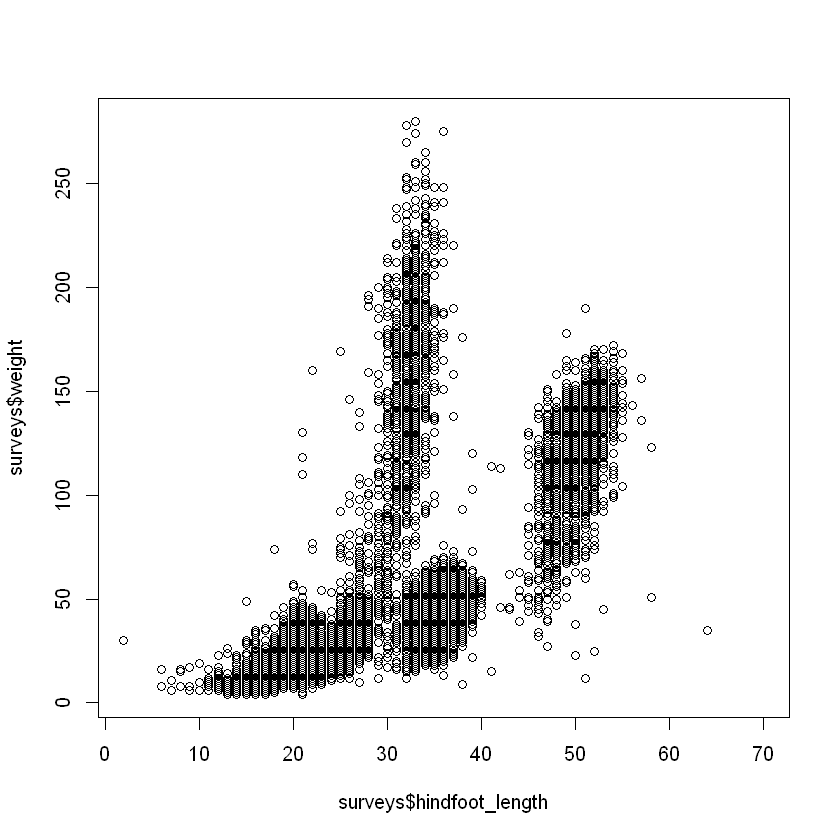

In [10]:
surveys$sex <- factor(surveys$sex)

In [12]:
class(surveys$sex)


[1] "factor"

In [13]:
summary(surveys$sex)

F     M 
 1748 15690 17348

<div class="Q"><br>

Question goes here.

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

Question goes here.

<br><br><div class="qhelp"></div></div>

<span class="console"></span> <br>
----------------------------- <br>
<span class="editor"></span> <br>
----------------------------- <br>
<span class="c2c"></span> <br>
<div class="c2c"></div> <br>
----------------------------- <br>
<span class="run"></span> <br>
<div class="run"></div> <br>
----------------------------- <br>
<span class="runcell"></span> <br>
<div class="runcell"></div> <br>
----------------------------- <br>
<span class="file">Text</span> <br>
<div class="file">Text</div> <br>
----------------------------- <br>
<span class="important"></span> <br>
<div class="important"></div> <br>
----------------------------- <br>
<span class="note"></span> <br>
<div class="note"></div> <br>
----------------------------- <br>
<span class="checkpoint">Text</span> <br>
<div class="checkpoint">Text</div> <br>
-----------------------------
<span class="codeerror">Text</span> <br>
<div class="codeerror">Text</div> <br>
----------------------------- <br>
<span class="lineerror">Text</span> <br>
<div class="lineerror">Text</div> <br>
----------------------------- <br>
<span class="terminal"></span> <br>
<div class="terminal"></div> <br>
----------------------------- <br>
<span class="terminalBlock">Text</span> <br>
<div class="terminalBlock">Text</div> <br>
----------------------------- <br>
<span class="nomenclature">nomenclature</span> <br>
<div class="nomenclature">nomenclature</div> <br>
----------------------------- <br>

<span class="console"></span> <br>
----------------------------- <br>
<span class="editor"></span> <br>
----------------------------- <br>
<span class="c2c"></span> <br>
<div class="c2c"></div> <br>
----------------------------- <br>
<span class="run"></span> <br>
<div class="run"></div> <br>
----------------------------- <br>
<span class="runcell"></span> <br>
<div class="runcell"></div> <br>
----------------------------- <br>
<span class="file">Text</span> <br>
<div class="file">Text</div> <br>
----------------------------- <br>
<span class="important"></span> <br>
<div class="important"></div> <br>
----------------------------- <br>
<span class="note"></span> <br>
<div class="note"></div> <br>
----------------------------- <br>
<span class="checkpoint">Text</span> <br>
<div class="checkpoint">Text</div> <br>
-----------------------------
<span class="codeerror">Text</span> <br>
<div class="codeerror">Text</div> <br>
----------------------------- <br>
<span class="lineerror">Text</span> <br>
<div class="lineerror">Text</div> <br>
----------------------------- <br>
<span class="terminal"></span> <br>
<div class="terminal"></div> <br>
----------------------------- <br>
<span class="terminalBlock">Text</span> <br>
<div class="terminalBlock">Text</div> <br>
----------------------------- <br>
<span class="nomenclature">nomenclature</span> <br>
<div class="nomenclature">nomenclature</div> <br>
----------------------------- <br>
<span class="code">code</span> <br>
<div class="code">code</div> <br>
----------------------------- <br>
<span class="rendered_html">rendered_html</span> <br>
<div class="rendered_html">rendered_html</div> <br>
----------------------------- <br>

<div class="big_title">This is the end of lab</div>

*******************
*******************

Code below is for formatting of this lab. Do not alter!

In [4]:
cssFile <- '../css/custom.css'
IRdisplay::display_html(readChar(cssFile, file.info(cssFile)$size))

IRdisplay::display_html("<style>body {counter-reset: question_num;}.Q::before {counter-increment: question_num;
    content: 'QUESTION ' counter(question_num) '\\A'; white-space: pre; }</style>")